In [12]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.rc('figure',figsize=(17,13))
import plotly.express as px
from plotly.subplots import make_subplots

In [13]:
# panel 
# !pip install panel
# jupyter serverextension enable panel.io.jupyter_server_extension

In [14]:
df_msft = pd.read_csv('Microsoft_Twitter.csv')
df_msft

,Unnamed: 0,tweet_id,name,screen_name,retweet_count,text,mined_at,created_at,favourite_count,hashtags,status_count,location,source_device,retweet_text,quote_text,quote_screen_name
0,0,1.496600e+18,Microsoft,Microsoft,18,Resources to accelerate your inclusion journey...,47:49.2,2022-02-23 21:45:03+00:00,123,[],26150,NaN,Sprinklr Publishing,None,None,None
1,1,1.496600e+18,Microsoft,Microsoft,58,"Stephanie J. Creary, Wharton School Assistant ...",47:49.2,2022-02-23 21:45:02+00:00,301,[],26150,NaN,Sprinklr Publishing,None,None,None
2,2,1.496580e+18,Microsoft,Microsoft,21,Southern communities inspire change through te...,47:49.2,2022-02-23 20:28:00+00:00,150,[],26150,NaN,Sprinklr Publishing,None,None,None
3,3,1.494460e+18,Microsoft,Microsoft,0,@MattressFirm Happens way too many times. 🙃,47:49.2,2022-02-18 00:03:06+00:00,5,[],26150,NaN,Sprinklr Publishing,None,None,None
4,4,1.494460e+18,Microsoft,Microsoft,1,@papajawn7704 With great power comes great res...,47:49.2,2022-02-18 00:02:37+00:00,11,[],26150,NaN,Sprinklr Publishing,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244,3244,1.407720e+18,Microsoft,Microsoft,938,RT @Windows: Set a reminder to experience what...,47:55.9,2021-06-23 15:38:48+00:00,0,[],26150,NaN,Sprinklr Publishing,"Set a reminder to experience what’s new, live,...",None,None
3245,3245,1.407470e+18,Microsoft,Microsoft,0,@iivan_mc Same.,47:55.9,2021-06-22 22:42:40+00:00,1,[],26150,NaN,Sprinklr Publishing,None,None,None
3246,3246,1.407470e+18,Microsoft,Microsoft,0,@LuiseFreese 😍,47:55.9,2021-06-22 22:42:03+00:00,5,[],26150,NaN,Sprinklr Publishing,None,None,None
3247,3247,1.407470e+18,Microsoft,Microsoft,0,@CastIrony 👀,47:55.9,2021-06-22 22:40:23+00:00,1,[],26150,NaN,Sprinklr Publishing,None,None,None


In [15]:
df_msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3249 entries, 0 to 3248
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3249 non-null   int64  
 1   tweet_id           3249 non-null   float64
 2   name               3249 non-null   object 
 3   screen_name        3249 non-null   object 
 4   retweet_count      3249 non-null   int64  
 5   text               3249 non-null   object 
 6   mined_at           3249 non-null   object 
 7   created_at         3249 non-null   object 
 8   favourite_count    3249 non-null   int64  
 9   hashtags           3249 non-null   object 
 10  status_count       3249 non-null   int64  
 11  location           0 non-null      float64
 12  source_device      3249 non-null   object 
 13  retweet_text       3249 non-null   object 
 14  quote_text         3249 non-null   object 
 15  quote_screen_name  3249 non-null   object 
dtypes: float64(2), int64(4),

In [16]:
#Check for duplicates
df_msft[df_msft.duplicated()]

,Unnamed: 0,tweet_id,name,screen_name,retweet_count,text,mined_at,created_at,favourite_count,hashtags,status_count,location,source_device,retweet_text,quote_text,quote_screen_name


In [17]:
# convert created_at column to datetime
df_msft['created_at'] = pd.to_datetime(df_msft['created_at'])

# Tweets per Day

In [18]:
#tweets per day
tweets_per_day = df_msft['created_at'].dt.strftime('%m-%d').value_counts().sort_index().reset_index(name='counts')

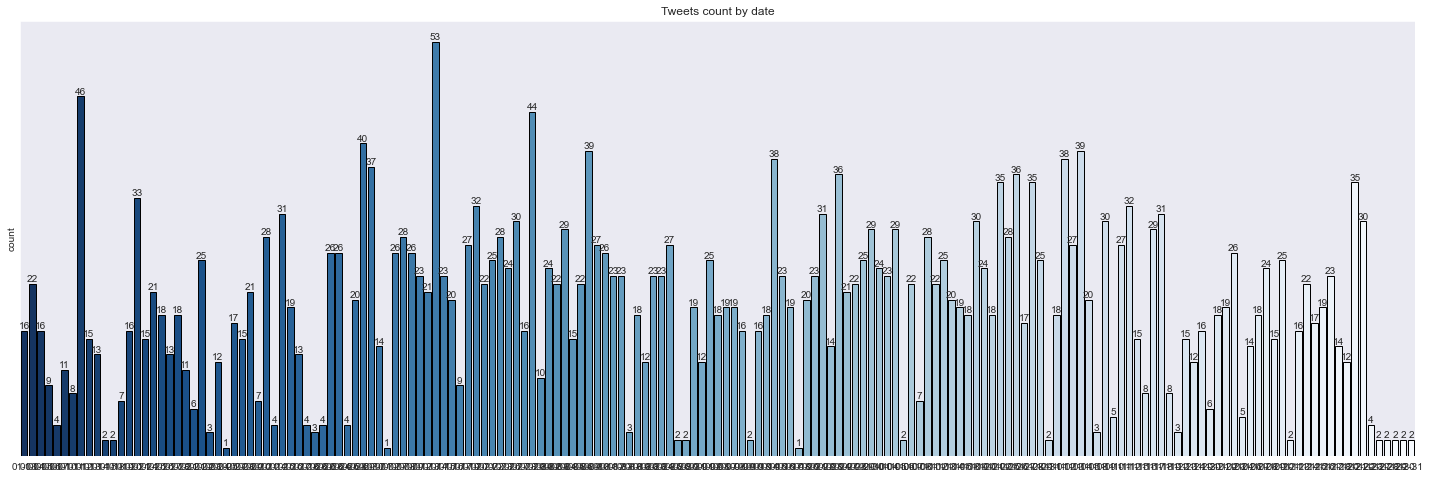

In [19]:
#plot
plt.figure(figsize=(25,8))
ax = sns.barplot(x='index', y='counts', data=tweets_per_day,edgecolor = 'black',ci=False, palette='Blues_r')
plt.title('Tweets count by date')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()


In [20]:
#check first date, newest
df_msft.head(1)['created_at']

0   2022-02-23 21:45:03+00:00
Name: created_at, dtype: datetime64[ns, UTC]

In [21]:
#check last date, oldest
df_msft.tail(1)['created_at']

3248   2021-06-22 22:37:51+00:00
Name: created_at, dtype: datetime64[ns, UTC]

# Tweets per hour

In [22]:
tweets_per_hour = df_msft['created_at'].dt.strftime('%H').value_counts().sort_index().reset_index(name='counts')

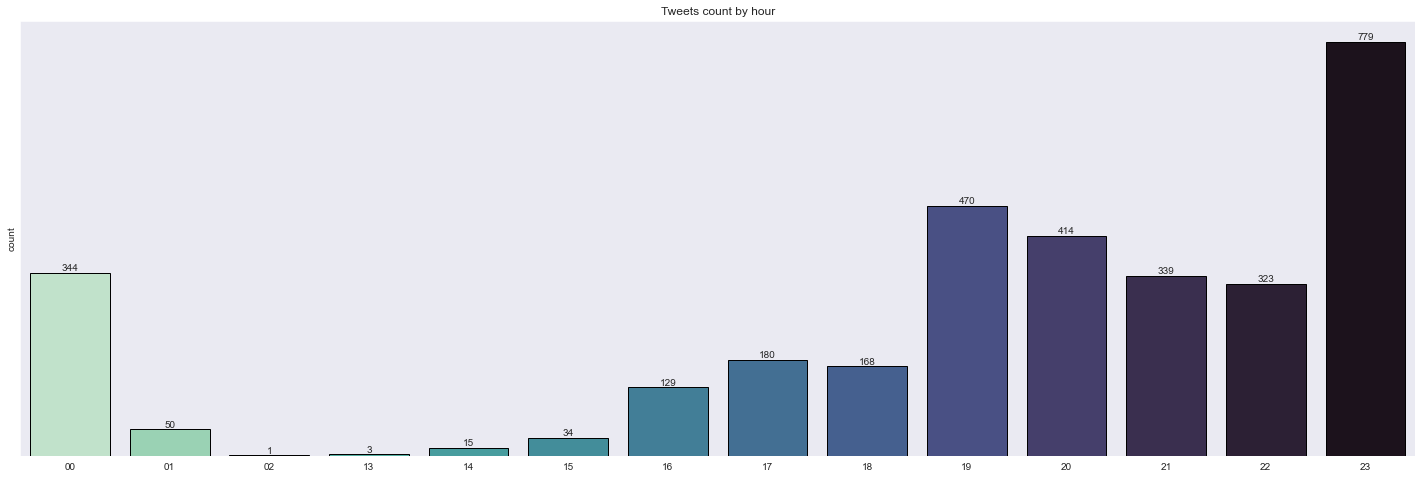

In [23]:
#plot
plt.figure(figsize=(25,8))
ax = sns.barplot(x='index', y='counts', data=tweets_per_hour,edgecolor = 'black',ci=False, palette='mako_r')
plt.title('Tweets count by hour')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()



# Favourite tweets

In [24]:
f_tweets = df_msft[['text','favourite_count']].sort_values('favourite_count', ascending=False)

In [25]:
#top 10 fav tweets
f_tweets['text'].iloc[:10].values

array(['If this gets 20k likes, we’ll replace the paperclip emoji in Microsoft 365 with Clippy. https://t.co/6T8ziboguC',
       'When Candy Crush and CoD become your actual job. Microsoft x Activision Blizzard. 🎮❤️📱\nhttps://t.co/nw4cLoaoTB https://t.co/QPGt9DC2jF',
       'Started from the bottom (left), now we’re here. #Windows11 https://t.co/2mon89dnjN',
       'POV: it’s 2001 and you just brought this home. https://t.co/78nqkU9K4X',
       'Happy 20th, @Xbox 🎉 #Xbox20\n\nHow it started        How it’s going https://t.co/SuC6NX62HS',
       'Ah, yes. https://t.co/Oi0npuLs2P',
       'Nostalgic. 🚀 https://t.co/7i3Cb9Tlwf',
       '10/05/21 https://t.co/2tnlI5uDR6', 'Hi.',
       'Microsoft Word Dark Mode. That’s the tweet. https://t.co/gpzmiT60Q7'],
      dtype=object)

# Retweets

In [26]:
retweets = df_msft[['text','retweet_count']].sort_values('retweet_count', ascending=False)

In [27]:
#top 10
retweets['text'].iloc[:10].values

array(['RT @Xbox: 🧽 x 🐢\n\nFollow and RT with #XboxAllStarBrawlsweepstakes for a chance to win one of these vibrant @NickBrawlGame Xbox Series X cons…',
       'If this gets 20k likes, we’ll replace the paperclip emoji in Microsoft 365 with Clippy. https://t.co/6T8ziboguC',
       "RT @Xbox: Today's been 20 years in the making 💚 #Xbox20 https://t.co/2pgfnkfkHw",
       'RT @Minecraft: It might just be blocks, but YOU are not just players!\n\nYour content has reached 1 trillion views on @YouTube! To celebrate,…',
       'When Candy Crush and CoD become your actual job. Microsoft x Activision Blizzard. 🎮❤️📱\nhttps://t.co/nw4cLoaoTB https://t.co/QPGt9DC2jF',
       "RT @Windows: As perfect as 11.11 *would* be, we just couldn't wait any longer to make #Windows11 available. Get it October 5th, and read al…",
       'RT @satyanadella: Together with @ATVI_AB, we will usher in a new era of gaming that puts players and creators first and makes gaming safe,…',
       'Started from the bottom (le

# Vader Sentiment Analysis

In [28]:
#!pip install vaderSentiment

In [29]:
#!pip install flair

In [30]:
#!pip install emoji

In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from flair.models import TextClassifier
from flair.data import Sentence
from wordcloud import WordCloud, STOPWORDS

import re, string
import emoji

In [32]:
sentiment_vader = SentimentIntensityAnalyzer()

In [33]:
sentiments = []
for tweet in df_msft.text:
    sentiment_dict = sentiment_vader.polarity_scores(tweet)
    sentiment_dict.pop('compound', None)
    sentiments.append(max(sentiment_dict , key=sentiment_dict.get))

In [34]:
df_msft['sentiment'] = sentiments
df_msft['sentiment'].value_counts()

neu    2847
pos     352
neg      50
Name: sentiment, dtype: int64

# Clean up the tweet text

In [35]:
# text cleaning functions 

#Clean emojis from text
def strip_emoji(text):
    return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): ## remove multiple spaces
    return re.sub("\s\s+" , " ", text)

def remove_spam(text):
    match = re.search(r'subscribe', text)
    if match:
        return ''
    else:
        return text

# Apply the cleaning functions to df

In [36]:
clean_texts = []
for t in df_msft.text:
    clean_texts.append(remove_spam(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t)))))))

In [37]:
# new column with clean_text
df_msft['clean_text'] = clean_texts

In [38]:
# lowercase
df_msft['clean_text'] = df_msft['clean_text'].str.lower() 

# check tweet clean text

In [39]:
text_len = []
for text in df_msft.clean_text:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [40]:
df_msft['text_len'] = text_len

In [41]:
df_msft

,Unnamed: 0,tweet_id,name,screen_name,retweet_count,text,mined_at,created_at,favourite_count,hashtags,status_count,location,source_device,retweet_text,quote_text,quote_screen_name,sentiment,clean_text,text_len
0,0,1.496600e+18,Microsoft,Microsoft,18,Resources to accelerate your inclusion journey...,47:49.2,2022-02-23 21:45:03+00:00,123,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,resources to accelerate your inclusion journey,6
1,1,1.496600e+18,Microsoft,Microsoft,58,"Stephanie J. Creary, Wharton School Assistant ...",47:49.2,2022-02-23 21:45:02+00:00,301,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,stephanie j creary wharton school assistant pr...,13
2,2,1.496580e+18,Microsoft,Microsoft,21,Southern communities inspire change through te...,47:49.2,2022-02-23 20:28:00+00:00,150,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,southern communities inspire change through te...,12
3,3,1.494460e+18,Microsoft,Microsoft,0,@MattressFirm Happens way too many times. 🙃,47:49.2,2022-02-18 00:03:06+00:00,5,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,happens way too many times,5
4,4,1.494460e+18,Microsoft,Microsoft,1,@papajawn7704 With great power comes great res...,47:49.2,2022-02-18 00:02:37+00:00,11,[],26150,NaN,Sprinklr Publishing,None,None,None,pos,with great power comes great responsibility,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244,3244,1.407720e+18,Microsoft,Microsoft,938,RT @Windows: Set a reminder to experience what...,47:55.9,2021-06-23 15:38:48+00:00,0,[],26150,NaN,Sprinklr Publishing,"Set a reminder to experience what’s new, live,...",None,None,neu,rt set a reminder to experience whats new live...,15
3245,3245,1.407470e+18,Microsoft,Microsoft,0,@iivan_mc Same.,47:55.9,2021-06-22 22:42:40+00:00,1,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,same,1
3246,3246,1.407470e+18,Microsoft,Microsoft,0,@LuiseFreese 😍,47:55.9,2021-06-22 22:42:03+00:00,5,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,,0
3247,3247,1.407470e+18,Microsoft,Microsoft,0,@CastIrony 👀,47:55.9,2021-06-22 22:40:23+00:00,1,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,,0


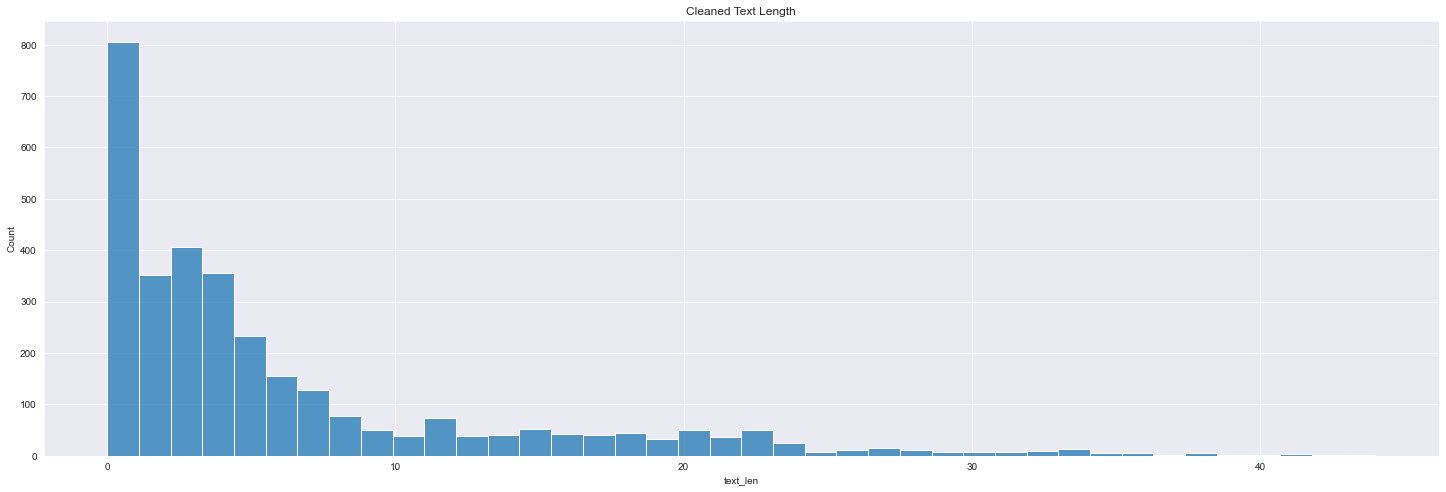

In [42]:
#plot cleaned text length
plt.figure(figsize=(25,8))
sns.histplot(x='text_len', data=df_msft, bins=40)
plt.title('Cleaned Text Length')
plt.show()

# too many tweet texts with few words

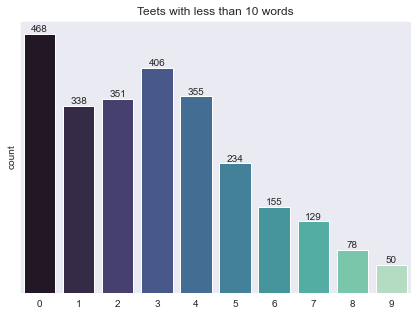

In [43]:
# plot
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df_msft[df_msft['text_len'] < 10], palette='mako')
plt.title('Teets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()



# Removed the tweets with fewer than 3 words

In [44]:
df_msft_cleaned = df_msft[df_msft['text_len'] > 2]

In [45]:
df_msft_cleaned

,Unnamed: 0,tweet_id,name,screen_name,retweet_count,text,mined_at,created_at,favourite_count,hashtags,status_count,location,source_device,retweet_text,quote_text,quote_screen_name,sentiment,clean_text,text_len
0,0,1.496600e+18,Microsoft,Microsoft,18,Resources to accelerate your inclusion journey...,47:49.2,2022-02-23 21:45:03+00:00,123,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,resources to accelerate your inclusion journey,6
1,1,1.496600e+18,Microsoft,Microsoft,58,"Stephanie J. Creary, Wharton School Assistant ...",47:49.2,2022-02-23 21:45:02+00:00,301,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,stephanie j creary wharton school assistant pr...,13
2,2,1.496580e+18,Microsoft,Microsoft,21,Southern communities inspire change through te...,47:49.2,2022-02-23 20:28:00+00:00,150,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,southern communities inspire change through te...,12
3,3,1.494460e+18,Microsoft,Microsoft,0,@MattressFirm Happens way too many times. 🙃,47:49.2,2022-02-18 00:03:06+00:00,5,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,happens way too many times,5
4,4,1.494460e+18,Microsoft,Microsoft,1,@papajawn7704 With great power comes great res...,47:49.2,2022-02-18 00:02:37+00:00,11,[],26150,NaN,Sprinklr Publishing,None,None,None,pos,with great power comes great responsibility,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,3239,1.407750e+18,Microsoft,Microsoft,17,Read through their chat and discover more abou...,47:55.9,2021-06-23 17:20:09+00:00,116,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,read through their chat and discover more abou...,16
3240,3240,1.407750e+18,Microsoft,Microsoft,37,".@ajohnsocyber and @LiatBenZur, executive co-s...",47:55.9,2021-06-23 17:20:09+00:00,150,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,and executive cosponsors of the global lgbtqi ...,29
3241,3241,1.407740e+18,Microsoft,Microsoft,22,RT @MSFTnews: .@Humana's Basic Needs initiativ...,47:55.9,2021-06-23 16:42:47+00:00,0,[],26150,NaN,Twitter Web App,.@Humana's Basic Needs initiative provides mea...,None,None,neu,rt basic needs initiative provides meals to me...,18
3242,3242,1.407730e+18,Microsoft,Microsoft,128,*joins meeting*\n\n*mutes mic*\n\n*types “hi” ...,47:55.9,2021-06-23 16:03:00+00:00,1572,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,joins meeting mutes mic types hi in chat also ...,15


# Analysis of cleaned df and further processing

In [46]:
sentiment_vader = SentimentIntensityAnalyzer()

In [47]:
sentiments = []
for tweet in df_msft_cleaned.text:
    sentiment_dict = sentiment_vader.polarity_scores(tweet)
    sentiment_dict.pop('compound', None)
    sentiments.append(max(sentiment_dict , key=sentiment_dict.get))

In [48]:
df_msft_cleaned['sentiment'] = sentiments
df_msft_cleaned['sentiment'].value_counts()

C:\Users\eddie\AppData\Local\Temp/ipykernel_14392/3449427757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msft_cleaned['sentiment'] = sentiments


neu    1943
pos     130
neg      19
Name: sentiment, dtype: int64

# Further text cleaning

In [49]:
# cleaning functions

#Clean emojis from text
def strip_emoji(text):
    return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): ## remove multiple spaces
    return re.sub("\s\s+" , " ", text)

def remove_spam(text):
    match = re.search(r'subscribe', text)
    if match:
        return ''
    else:
        return text

# Apply cleaning functions to cleaned df

In [50]:
texts_new = []
for t in df_msft_cleaned.text:
    texts_new.append(remove_spam(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t)))))))

In [51]:
df_msft_cleaned['text_clean'] = texts_new 

C:\Users\eddie\AppData\Local\Temp/ipykernel_14392/2561532737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msft_cleaned['text_clean'] = texts_new


In [52]:
# lowercase
df_msft_cleaned['text_clean'] = df_msft_cleaned['text_clean'].str.lower() 

C:\Users\eddie\AppData\Local\Temp/ipykernel_14392/194949572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msft_cleaned['text_clean'] = df_msft_cleaned['text_clean'].str.lower()


# check double cleaned text length

In [53]:
text_len = []
for text in df_msft_cleaned.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [54]:
df_msft_cleaned['text_len'] = text_len

C:\Users\eddie\AppData\Local\Temp/ipykernel_14392/2911243300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msft_cleaned['text_len'] = text_len


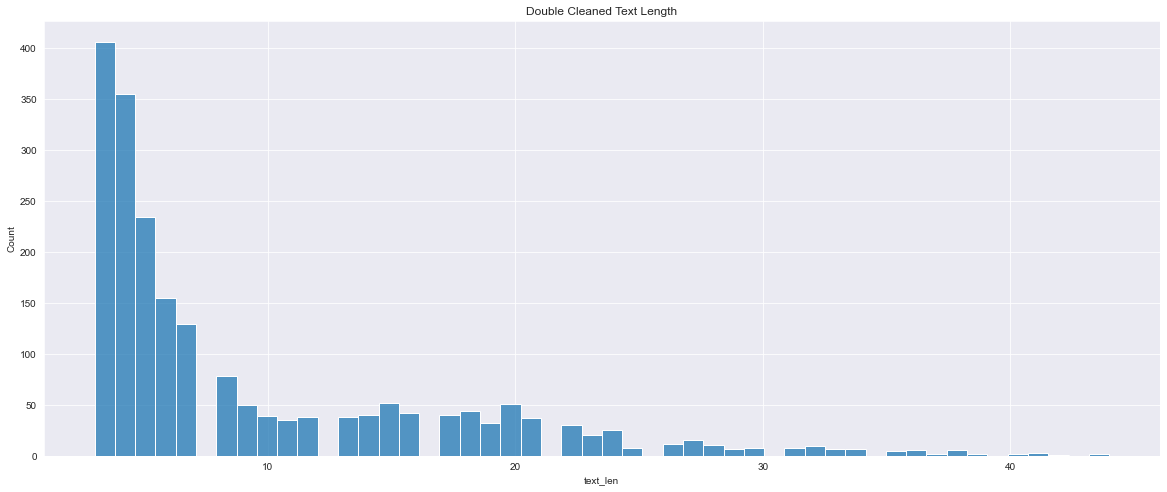

In [55]:
plt.figure(figsize=(20,8))
sns.histplot(x='text_len', data=df_msft_cleaned, bins=50)
plt.title('Double Cleaned Text Length')
plt.show()

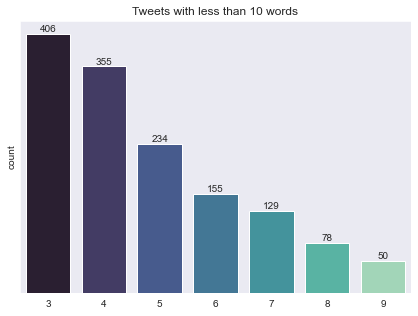

In [56]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df_msft_cleaned[df_msft_cleaned['text_len'] < 10], palette='mako')
plt.title('Tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

# Vader Sentiment Analysis with double cleaned text

In [57]:
sentiment_vader = SentimentIntensityAnalyzer()

In [58]:
sentiments = []
for tweet in df_msft_cleaned.text:
    sentiment_dict = sentiment_vader.polarity_scores(tweet)
    sentiment_dict.pop('compound', None)
    sentiments.append(max(sentiment_dict , key=sentiment_dict.get))

In [59]:
df_msft_cleaned['sentiment_vader'] = sentiments
df_msft_cleaned['sentiment_vader'].value_counts()

C:\Users\eddie\AppData\Local\Temp/ipykernel_14392/604340580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msft_cleaned['sentiment_vader'] = sentiments


neu    1943
pos     130
neg      19
Name: sentiment_vader, dtype: int64

In [60]:
df_msft_cleaned

,Unnamed: 0,tweet_id,name,screen_name,retweet_count,text,mined_at,created_at,favourite_count,hashtags,status_count,location,source_device,retweet_text,quote_text,quote_screen_name,sentiment,clean_text,text_len,text_clean,sentiment_vader
0,0,1.496600e+18,Microsoft,Microsoft,18,Resources to accelerate your inclusion journey...,47:49.2,2022-02-23 21:45:03+00:00,123,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,resources to accelerate your inclusion journey,6,resources to accelerate your inclusion journey,neu
1,1,1.496600e+18,Microsoft,Microsoft,58,"Stephanie J. Creary, Wharton School Assistant ...",47:49.2,2022-02-23 21:45:02+00:00,301,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,stephanie j creary wharton school assistant pr...,13,stephanie j creary wharton school assistant pr...,neu
2,2,1.496580e+18,Microsoft,Microsoft,21,Southern communities inspire change through te...,47:49.2,2022-02-23 20:28:00+00:00,150,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,southern communities inspire change through te...,12,southern communities inspire change through te...,neu
3,3,1.494460e+18,Microsoft,Microsoft,0,@MattressFirm Happens way too many times. 🙃,47:49.2,2022-02-18 00:03:06+00:00,5,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,happens way too many times,5,happens way too many times,neu
4,4,1.494460e+18,Microsoft,Microsoft,1,@papajawn7704 With great power comes great res...,47:49.2,2022-02-18 00:02:37+00:00,11,[],26150,NaN,Sprinklr Publishing,None,None,None,pos,with great power comes great responsibility,6,with great power comes great responsibility,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,3239,1.407750e+18,Microsoft,Microsoft,17,Read through their chat and discover more abou...,47:55.9,2021-06-23 17:20:09+00:00,116,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,read through their chat and discover more abou...,16,read through their chat and discover more abou...,neu
3240,3240,1.407750e+18,Microsoft,Microsoft,37,".@ajohnsocyber and @LiatBenZur, executive co-s...",47:55.9,2021-06-23 17:20:09+00:00,150,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,and executive cosponsors of the global lgbtqi ...,29,and executive cosponsors of the global lgbtqi ...,neu
3241,3241,1.407740e+18,Microsoft,Microsoft,22,RT @MSFTnews: .@Humana's Basic Needs initiativ...,47:55.9,2021-06-23 16:42:47+00:00,0,[],26150,NaN,Twitter Web App,.@Humana's Basic Needs initiative provides mea...,None,None,neu,rt basic needs initiative provides meals to me...,18,rt basic needs initiative provides meals to me...,neu
3242,3242,1.407730e+18,Microsoft,Microsoft,128,*joins meeting*\n\n*mutes mic*\n\n*types “hi” ...,47:55.9,2021-06-23 16:03:00+00:00,1572,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,joins meeting mutes mic types hi in chat also ...,15,joins meeting mutes mic types hi in chat also ...,neu


# NLTK Sentiment Analysis

In [61]:
sentiment_nltk = SentimentIntensityAnalyzer()

In [62]:
sentiments_nltk = []
for tweet in df_msft_cleaned.text_clean:
    sentiment_dict = sentiment_nltk.polarity_scores(tweet)
    sentiment_dict.pop('compound', None)
    sentiments_nltk.append(max(sentiment_dict , key=sentiment_dict.get))

In [63]:
df_msft_cleaned['sentiment_nltk'] = sentiments_nltk
df_msft_cleaned['sentiment_nltk'].value_counts()

C:\Users\eddie\AppData\Local\Temp/ipykernel_14392/3293776843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msft_cleaned['sentiment_nltk'] = sentiments_nltk


neu    1799
pos     251
neg      42
Name: sentiment_nltk, dtype: int64

# Flair Sentiment Analysis

In [64]:
# this takes a long time to load, enjoy a drink
flair = TextClassifier.load('sentiment-fast');

2022-03-02 09:11:48,808 loading file C:\Users\eddie\.flair\models\sentiment-en-mix-ft-rnn_v8.pt


In [65]:
def emotion_threshold(emo, val):
    if (emo =='POSITIVE') & (val >= 0.7): #outputs 'pos' if positive confidence > 70%
        return 'pos'
    elif(emo =='NEGATIVE') & (val >= 0.7): #outputs 'neg' if negative confidence > 70%
        return 'neg'
    else:
        return 'neu' #else outputs neutral emotion

In [66]:
sentiments_flair = []
for tweet in df_msft_cleaned.text_clean:
    sentence = Sentence(tweet)
    flair.predict(sentence)
    emo = re.findall(r"([A-Z]\w+)",str(sentence.labels))[0] #extract the emotion
    val = float(re.findall(r"([+-]?[0-9]*[.]?[0-9]+)",str(sentence.labels))[0]) #extract the confidence value for the emotion
    sentiments_flair.append(emotion_threshold(emo,val))

In [67]:
df_msft_cleaned['sentiment_flair'] = sentiments_flair
df_msft_cleaned['sentiment_flair'].value_counts()

C:\Users\eddie\AppData\Local\Temp/ipykernel_14392/1558289606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msft_cleaned['sentiment_flair'] = sentiments_flair


pos    1284
neg     420
neu     388
Name: sentiment_flair, dtype: int64

# Text Blob Sentiment Analysis

In [68]:
def polarity_to_text(blob):
    if (blob.sentiment.polarity > 0.1):
        return 'pos'
    elif(blob.sentiment.polarity <= 0.1 and  blob.sentiment.polarity >= -0.05):
        return 'neu'
    else:
        return 'neg'

In [69]:
sentiments_blob = []
for tweet in df_msft_cleaned.text_clean:
    blob = TextBlob(tweet)
    sentiments_blob.append(polarity_to_text(blob))

In [70]:
df_msft_cleaned['sentiment_blob'] = sentiments_blob
df_msft_cleaned['sentiment_blob'].value_counts()

C:\Users\eddie\AppData\Local\Temp/ipykernel_14392/2910097067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msft_cleaned['sentiment_blob'] = sentiments_blob


neu    1169
pos     776
neg     147
Name: sentiment_blob, dtype: int64

# Wordclouds wit positive words comparing the different Analyses 

In [71]:
df_msft_cleaned

,Unnamed: 0,tweet_id,name,screen_name,retweet_count,text,mined_at,created_at,favourite_count,hashtags,status_count,location,source_device,retweet_text,quote_text,quote_screen_name,sentiment,clean_text,text_len,text_clean,sentiment_vader,sentiment_nltk,sentiment_flair,sentiment_blob
0,0,1.496600e+18,Microsoft,Microsoft,18,Resources to accelerate your inclusion journey...,47:49.2,2022-02-23 21:45:03+00:00,123,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,resources to accelerate your inclusion journey,6,resources to accelerate your inclusion journey,neu,neu,pos,neu
1,1,1.496600e+18,Microsoft,Microsoft,58,"Stephanie J. Creary, Wharton School Assistant ...",47:49.2,2022-02-23 21:45:02+00:00,301,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,stephanie j creary wharton school assistant pr...,13,stephanie j creary wharton school assistant pr...,neu,neu,pos,neu
2,2,1.496580e+18,Microsoft,Microsoft,21,Southern communities inspire change through te...,47:49.2,2022-02-23 20:28:00+00:00,150,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,southern communities inspire change through te...,12,southern communities inspire change through te...,neu,neu,pos,neu
3,3,1.494460e+18,Microsoft,Microsoft,0,@MattressFirm Happens way too many times. 🙃,47:49.2,2022-02-18 00:03:06+00:00,5,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,happens way too many times,5,happens way too many times,neu,neu,neg,pos
4,4,1.494460e+18,Microsoft,Microsoft,1,@papajawn7704 With great power comes great res...,47:49.2,2022-02-18 00:02:37+00:00,11,[],26150,NaN,Sprinklr Publishing,None,None,None,pos,with great power comes great responsibility,6,with great power comes great responsibility,pos,pos,pos,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,3239,1.407750e+18,Microsoft,Microsoft,17,Read through their chat and discover more abou...,47:55.9,2021-06-23 17:20:09+00:00,116,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,read through their chat and discover more abou...,16,read through their chat and discover more abou...,neu,neu,pos,pos
3240,3240,1.407750e+18,Microsoft,Microsoft,37,".@ajohnsocyber and @LiatBenZur, executive co-s...",47:55.9,2021-06-23 17:20:09+00:00,150,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,and executive cosponsors of the global lgbtqi ...,29,and executive cosponsors of the global lgbtqi ...,neu,neu,pos,neu
3241,3241,1.407740e+18,Microsoft,Microsoft,22,RT @MSFTnews: .@Humana's Basic Needs initiativ...,47:55.9,2021-06-23 16:42:47+00:00,0,[],26150,NaN,Twitter Web App,.@Humana's Basic Needs initiative provides mea...,None,None,neu,rt basic needs initiative provides meals to me...,18,rt basic needs initiative provides meals to me...,neu,neu,pos,neu
3242,3242,1.407730e+18,Microsoft,Microsoft,128,*joins meeting*\n\n*mutes mic*\n\n*types “hi” ...,47:55.9,2021-06-23 16:03:00+00:00,1572,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,joins meeting mutes mic types hi in chat also ...,15,joins meeting mutes mic types hi in chat also ...,neu,neu,neu,neu


In [72]:
texts_vader_pos = " ".join(sentiment for sentiment in df_msft_cleaned[df_msft_cleaned['sentiment_vader']=='pos']['text_clean'])
texts_nltk_pos = " ".join(sentiment for sentiment in df_msft_cleaned[df_msft_cleaned['sentiment_nltk']=='pos']['text_clean'])
texts_flair_pos = " ".join(sentiment for sentiment in df_msft_cleaned[df_msft_cleaned['sentiment_flair']=='pos']['text_clean'])
texts_blob_pos = " ".join(sentiment for sentiment in df_msft_cleaned[df_msft_cleaned['sentiment_blob']=='pos']['text_clean'])

In [73]:
# vader
wordcloud_vader_pos = WordCloud(width=800,
                      height=400,
                      max_font_size=200,
                      max_words=50,
                      collocations=False,
                      background_color='black').generate(texts_vader_pos)

In [74]:
# nltk
wordcloud_nltk_pos = WordCloud(width=800,
                      height=400,
                      max_font_size=200,
                      max_words=50,
                      collocations=False,
                      background_color='black').generate(texts_nltk_pos)

In [75]:
# flair
wordcloud_flair_pos = WordCloud(width=800,
                      height=400,
                      max_font_size=200,
                      max_words=50,
                      collocations=False,
                      background_color='black').generate(texts_flair_pos)

In [76]:
# text blob
wordcloud_blob_pos = WordCloud(width=800,
                      height=400,
                      max_font_size=200,
                      max_words=50,
                      collocations=False,
                      background_color='black').generate(texts_blob_pos)

# Plot all sentiment analyses 

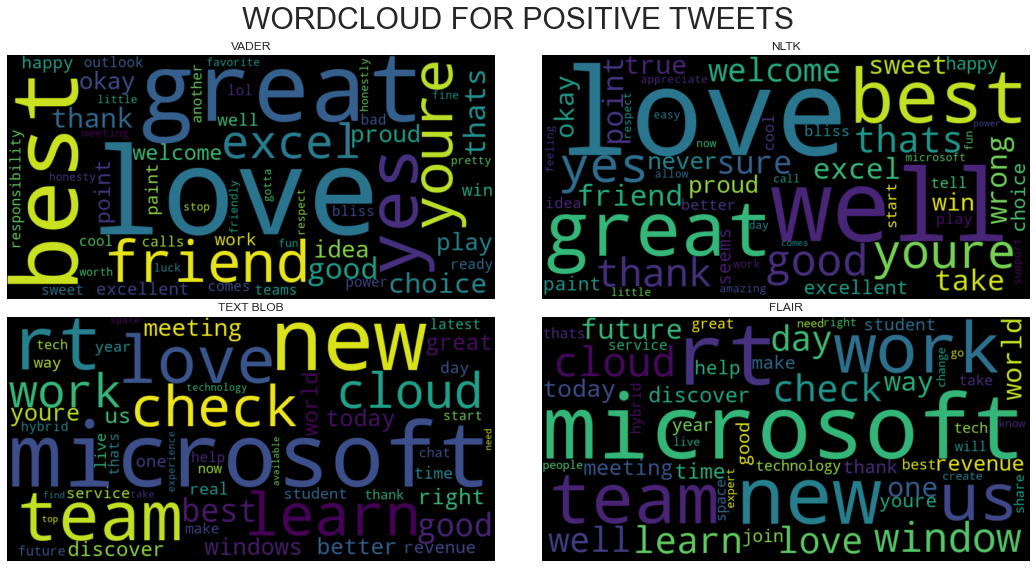

In [77]:
fig, ax = plt.subplots(2,2, figsize=(15,8))
plt.suptitle('WORDCLOUD FOR POSITIVE TWEETS', fontsize=30)

ax[0,0].imshow(wordcloud_vader_pos, interpolation="bilinear")
ax[0,0].axis("off")
ax[0,0].set_title('VADER')

ax[0,1].imshow(wordcloud_nltk_pos, interpolation="bilinear")
ax[0,1].axis("off")
ax[0,1].set_title('NLTK')

ax[1,1].imshow(wordcloud_flair_pos, interpolation="bilinear")
ax[1,1].axis("off")
ax[1,1].set_title('FLAIR')

ax[1,0].imshow(wordcloud_blob_pos, interpolation="bilinear")
ax[1,0].axis("off")
ax[1,0].set_title('TEXT BLOB')

plt.tight_layout()
plt.show()

# Top 10 sentences for each sentiment analysis form

In [78]:
# vader
df_msft_cleaned.text_clean[df_msft_cleaned['sentiment_vader']=='pos'].sample(10).values

array(['we respect that', 'its a friendly ghost', 'love this for you',
       'amazing work sweetie',
       'have you ever played tag except in a shared excel doc',
       'trick or treat', 'love this for you', 'our wfh best friends',
       'okay just kidding', 'pretty great eh'], dtype=object)

In [79]:
# Nltk
df_msft_cleaned.text_clean[df_msft_cleaned['sentiment_nltk']=='pos'].sample(10).values

array(['seems like a keeper', 'well take it', 'gotta love it',
       'share a cup', 'we like it', 'okay okay take it easy',
       'lucia youre doing a great job', 'this is progress',
       'we love the enthusiasm', 'love that for you'], dtype=object)

In [80]:
# Flair
df_msft_cleaned.text_clean[df_msft_cleaned['sentiment_flair']=='pos'].sample(10).values

array(['rt please join us today as we share the new generation of windows',
       'when it works it works', 'if you say so',
       'the cloud unlocked new ways to live work and connect from anywhere find out how this accessibility is driving a new trend digital optimism',
       'its a onceinalifetime experience to be able to fly wherever i want this adaptive cockpit for accessibility is cleared for takeoff',
       'learn how to build safe spaces for any classroom teaching style using microsoft teams discover where to begin',
       'you made our day',
       'mobile mentor supplies tablets to nonprofit hospice caretakers and their patients for remote assistance find out how their efforts help communities in need',
       'its truly a work of art', 'they grow up so fast'], dtype=object)

In [81]:
# text blob
df_msft_cleaned.text_clean[df_msft_cleaned['sentiment_blob']=='pos'].sample(10).values

array(['youve got that right', 'the grind is real',
       'a gif is worth 1000 words or something like that',
       'you have great taste', 'this is true', 'its that kind of day huh',
       'tomorrows leaders have goals to change the world and experts are inspired to help more on fostering inclusion',
       'we love a postive outlook',
       'goal of the day get more than 3 laugh reactions iykyk',
       'this could be your best work yet'], dtype=object)

# Tweets and Retweets Analysis

In [82]:
# top 15
favourite_tweets = df_msft_cleaned[['text','favourite_count','sentiment_vader','sentiment_nltk','sentiment_blob','sentiment_flair']].sort_values('favourite_count', ascending=False)
favourite_tweets.iloc[:15]

,text,favourite_count,sentiment_vader,sentiment_nltk,sentiment_blob,sentiment_flair
2942,"If this gets 20k likes, we’ll replace the pape...",171837,neu,neu,neu,pos
362,When Candy Crush and CoD become your actual jo...,26679,neu,neu,neu,neu
3207,"Started from the bottom (left), now we’re here...",16538,neu,neu,neu,neg
233,POV: it’s 2001 and you just brought this home....,12541,neu,neu,neu,pos
1034,"Happy 20th, @Xbox 🎉 #Xbox20\n\nHow it started ...",12039,neu,neu,pos,pos
2538,Microsoft Word Dark Mode. That’s the tweet. ht...,10802,neu,neu,neg,neg
447,One time for the memories. https://t.co/F4R32x...,9623,neu,neu,neu,pos
1757,September 30th vs October 1st. https://t.co/KI...,9073,neu,neu,neu,neu
2816,Yes. We replaced the standard paperclip emoji ...,8682,neu,neu,neu,neg
3204,This photo contains a hidden message. https://...,8612,neu,neu,neg,neu


In [83]:
# top 15
retweets = df_msft_cleaned[['text','retweet_count','sentiment_vader','sentiment_nltk','sentiment_blob','sentiment_flair']].sort_values('retweet_count', ascending=False)
retweets.iloc[:15]

,text,retweet_count,sentiment_vader,sentiment_nltk,sentiment_blob,sentiment_flair
1656,RT @Xbox: 🧽 x 🐢\n\nFollow and RT with #XboxAll...,78766,neu,neu,pos,pos
2942,"If this gets 20k likes, we’ll replace the pape...",13599,neu,neu,neu,pos
1035,RT @Xbox: Today's been 20 years in the making ...,8691,neu,neu,neu,pos
682,"RT @Minecraft: It might just be blocks, but YO...",4543,neu,neu,neu,neg
362,When Candy Crush and CoD become your actual jo...,4260,neu,neu,neu,neu
2229,"RT @Windows: As perfect as 11.11 *would* be, w...",3048,neu,neu,pos,pos
361,"RT @satyanadella: Together with @ATVI_AB, we w...",2525,neu,neu,pos,pos
3207,"Started from the bottom (left), now we’re here...",2512,neu,neu,neu,neg
3208,RT @Windows: We're going live soon! Set a remi...,2424,neu,neu,pos,pos
105,There are two types of dogs on Teams meetings.,2128,neu,neu,neu,neg


In [84]:
#save cleaned df to csv
df_msft_cleaned.to_csv('Microsoft_Twitter_Cleaned.csv')

In [104]:
df_msft_cleaned

,Unnamed: 0,tweet_id,name,screen_name,retweet_count,text,mined_at,created_at,favourite_count,hashtags,status_count,location,source_device,retweet_text,quote_text,quote_screen_name,sentiment,clean_text,text_len,text_clean,sentiment_vader,sentiment_nltk,sentiment_flair,sentiment_blob
0,0,1.496600e+18,Microsoft,Microsoft,18,Resources to accelerate your inclusion journey...,47:49.2,2022-02-23 21:45:03+00:00,123,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,resources to accelerate your inclusion journey,6,resources to accelerate your inclusion journey,neu,neu,pos,neu
1,1,1.496600e+18,Microsoft,Microsoft,58,"Stephanie J. Creary, Wharton School Assistant ...",47:49.2,2022-02-23 21:45:02+00:00,301,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,stephanie j creary wharton school assistant pr...,13,stephanie j creary wharton school assistant pr...,neu,neu,pos,neu
2,2,1.496580e+18,Microsoft,Microsoft,21,Southern communities inspire change through te...,47:49.2,2022-02-23 20:28:00+00:00,150,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,southern communities inspire change through te...,12,southern communities inspire change through te...,neu,neu,pos,neu
3,3,1.494460e+18,Microsoft,Microsoft,0,@MattressFirm Happens way too many times. 🙃,47:49.2,2022-02-18 00:03:06+00:00,5,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,happens way too many times,5,happens way too many times,neu,neu,neg,pos
4,4,1.494460e+18,Microsoft,Microsoft,1,@papajawn7704 With great power comes great res...,47:49.2,2022-02-18 00:02:37+00:00,11,[],26150,NaN,Sprinklr Publishing,None,None,None,pos,with great power comes great responsibility,6,with great power comes great responsibility,pos,pos,pos,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,3239,1.407750e+18,Microsoft,Microsoft,17,Read through their chat and discover more abou...,47:55.9,2021-06-23 17:20:09+00:00,116,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,read through their chat and discover more abou...,16,read through their chat and discover more abou...,neu,neu,pos,pos
3240,3240,1.407750e+18,Microsoft,Microsoft,37,".@ajohnsocyber and @LiatBenZur, executive co-s...",47:55.9,2021-06-23 17:20:09+00:00,150,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,and executive cosponsors of the global lgbtqi ...,29,and executive cosponsors of the global lgbtqi ...,neu,neu,pos,neu
3241,3241,1.407740e+18,Microsoft,Microsoft,22,RT @MSFTnews: .@Humana's Basic Needs initiativ...,47:55.9,2021-06-23 16:42:47+00:00,0,[],26150,NaN,Twitter Web App,.@Humana's Basic Needs initiative provides mea...,None,None,neu,rt basic needs initiative provides meals to me...,18,rt basic needs initiative provides meals to me...,neu,neu,pos,neu
3242,3242,1.407730e+18,Microsoft,Microsoft,128,*joins meeting*\n\n*mutes mic*\n\n*types “hi” ...,47:55.9,2021-06-23 16:03:00+00:00,1572,[],26150,NaN,Sprinklr Publishing,None,None,None,neu,joins meeting mutes mic types hi in chat also ...,15,joins meeting mutes mic types hi in chat also ...,neu,neu,neu,neu


In [107]:
df_msft_cleaned.dtypes

Unnamed: 0                         int64
tweet_id                         float64
name                              object
screen_name                       object
retweet_count                      int64
text                              object
mined_at                          object
created_at           datetime64[ns, UTC]
favourite_count                    int64
hashtags                          object
status_count                       int64
location                         float64
source_device                     object
retweet_text                      object
quote_text                        object
quote_screen_name                 object
sentiment                         object
clean_text                        object
text_len                           int64
text_clean                        object
sentiment_vader                   object
sentiment_nltk                    object
sentiment_flair                   object
sentiment_blob                    object
dtype: object

In [110]:
df_msft_cleaned.columns

Index(['Unnamed: 0', 'tweet_id', 'name', 'screen_name', 'retweet_count',
       'text', 'mined_at', 'created_at', 'favourite_count', 'hashtags',
       'status_count', 'location', 'source_device', 'retweet_text',
       'quote_text', 'quote_screen_name', 'sentiment', 'clean_text',
       'text_len', 'text_clean', 'sentiment_vader', 'sentiment_nltk',
       'sentiment_flair', 'sentiment_blob'],
      dtype='object')

In [117]:
df_msft_cleaned_final = df_msft_cleaned.drop(['Unnamed: 0','tweet_id','name','screen_name','text','mined_at','hashtags','location','source_device','retweet_text','quote_text','quote_screen_name','sentiment','clean_text'], axis = 1)

In [118]:
df_msft_cleaned_final

,retweet_count,created_at,favourite_count,status_count,text_len,text_clean,sentiment_vader,sentiment_nltk,sentiment_flair,sentiment_blob
0,18,2022-02-23 21:45:03+00:00,123,26150,6,resources to accelerate your inclusion journey,neu,neu,pos,neu
1,58,2022-02-23 21:45:02+00:00,301,26150,13,stephanie j creary wharton school assistant pr...,neu,neu,pos,neu
2,21,2022-02-23 20:28:00+00:00,150,26150,12,southern communities inspire change through te...,neu,neu,pos,neu
3,0,2022-02-18 00:03:06+00:00,5,26150,5,happens way too many times,neu,neu,neg,pos
4,1,2022-02-18 00:02:37+00:00,11,26150,6,with great power comes great responsibility,pos,pos,pos,pos
...,...,...,...,...,...,...,...,...,...,...
3239,17,2021-06-23 17:20:09+00:00,116,26150,16,read through their chat and discover more abou...,neu,neu,pos,pos
3240,37,2021-06-23 17:20:09+00:00,150,26150,29,and executive cosponsors of the global lgbtqi ...,neu,neu,pos,neu
3241,22,2021-06-23 16:42:47+00:00,0,26150,18,rt basic needs initiative provides meals to me...,neu,neu,pos,neu
3242,128,2021-06-23 16:03:00+00:00,1572,26150,15,joins meeting mutes mic types hi in chat also ...,neu,neu,neu,neu


In [162]:
#save cleaned final df to csv
df_msft_cleaned_final.to_csv('Microsoft_Twitter_Cleaned_Final.csv')

In [128]:
# convert categorical values to numerical
categorical_sentiment = df_msft_cleaned_final[['sentiment_vader','sentiment_nltk','sentiment_flair','sentiment_blob']]

In [140]:
categorical_sentiment

,sentiment_vader,sentiment_nltk,sentiment_flair,sentiment_blob
0,neu,neu,pos,neu
1,neu,neu,pos,neu
2,neu,neu,pos,neu
3,neu,neu,neg,pos
4,pos,pos,pos,pos
...,...,...,...,...
3239,neu,neu,pos,pos
3240,neu,neu,pos,neu
3241,neu,neu,pos,neu
3242,neu,neu,neu,neu


In [146]:
x = {'pos':1,'neg':-1,'neu':0}
categorical_sentiment['sentiment_vader'] = categorical_sentiment['sentiment_vader'].map(x).fillna(categorical_sentiment['sentiment_vader'])
categorical_sentiment['sentiment_nltk'] = categorical_sentiment['sentiment_nltk'].map(x).fillna(categorical_sentiment['sentiment_nltk'])
categorical_sentiment['sentiment_flair'] = categorical_sentiment['sentiment_flair'].map(x).fillna(categorical_sentiment['sentiment_flair'])
categorical_sentiment['sentiment_blob'] = categorical_sentiment['sentiment_blob'].map(x).fillna(categorical_sentiment['sentiment_blob'])

C:\Users\eddie\AppData\Local\Temp/ipykernel_14392/1192658421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_sentiment['sentiment_vader'] = categorical_sentiment['sentiment_vader'].map(x).fillna(categorical_sentiment['sentiment_vader'])
C:\Users\eddie\AppData\Local\Temp/ipykernel_14392/1192658421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_sentiment['sentiment_nltk'] = categorical_sentiment['sentiment_nltk'].map(x).fillna(categorical_sentiment['sentiment_nltk'])
C:\Users\

In [150]:
categorical_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 3244
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sentiment_vader  2092 non-null   float64
 1   sentiment_nltk   2092 non-null   int64  
 2   sentiment_flair  2092 non-null   int64  
 3   sentiment_blob   2092 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 146.3 KB


In [154]:
categorical_sentiment = categorical_sentiment.astype(int)

In [155]:
categorical_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 3244
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   sentiment_vader  2092 non-null   int32
 1   sentiment_nltk   2092 non-null   int32
 2   sentiment_flair  2092 non-null   int32
 3   sentiment_blob   2092 non-null   int32
dtypes: int32(4)
memory usage: 113.6 KB


In [ ]:
['Unnamed: 0', 'tweet_id', 'name', 'screen_name', 'retweet_count',
       'text', 'mined_at', 'created_at', 'favourite_count', 'hashtags',
       'status_count', 'location', 'source_device', 'retweet_text',
       'quote_text', 'quote_screen_name', 'sentiment', 'clean_text',
       'text_len', 'text_clean', 'sentiment_vader', 'sentiment_nltk',
       'sentiment_flair', 'sentiment_blob']

In [169]:
df__msft_cleaned_num = df_msft_cleaned_final[['created_at','retweet_count','favourite_count','status_count','text_len']]
df__msft_cleaned_num

,created_at,retweet_count,favourite_count,status_count,text_len
0,2022-02-23 21:45:03+00:00,18,123,26150,6
1,2022-02-23 21:45:02+00:00,58,301,26150,13
2,2022-02-23 20:28:00+00:00,21,150,26150,12
3,2022-02-18 00:03:06+00:00,0,5,26150,5
4,2022-02-18 00:02:37+00:00,1,11,26150,6
...,...,...,...,...,...
3239,2021-06-23 17:20:09+00:00,17,116,26150,16
3240,2021-06-23 17:20:09+00:00,37,150,26150,29
3241,2021-06-23 16:42:47+00:00,22,0,26150,18
3242,2021-06-23 16:03:00+00:00,128,1572,26150,15


In [170]:
df__msft_cleaned_num_sentiment = pd.concat([df__msft_cleaned_num,categorical_sentiment], axis = 1, join = 'inner')

In [172]:
df__msft_cleaned_num_sentiment.set_index('created_at')
df__msft_cleaned_num_sentiment

,created_at,retweet_count,favourite_count,status_count,text_len,sentiment_vader,sentiment_nltk,sentiment_flair,sentiment_blob
0,2022-02-23 21:45:03+00:00,18,123,26150,6,0,0,1,0
1,2022-02-23 21:45:02+00:00,58,301,26150,13,0,0,1,0
2,2022-02-23 20:28:00+00:00,21,150,26150,12,0,0,1,0
3,2022-02-18 00:03:06+00:00,0,5,26150,5,0,0,-1,1
4,2022-02-18 00:02:37+00:00,1,11,26150,6,1,1,1,1
...,...,...,...,...,...,...,...,...,...
3239,2021-06-23 17:20:09+00:00,17,116,26150,16,0,0,1,1
3240,2021-06-23 17:20:09+00:00,37,150,26150,29,0,0,1,0
3241,2021-06-23 16:42:47+00:00,22,0,26150,18,0,0,1,0
3242,2021-06-23 16:03:00+00:00,128,1572,26150,15,0,0,0,0


In [237]:
df__msft_cleaned_num_sentiment = df__msft_cleaned_num_sentiment.drop('status_count', axis =1)

In [251]:
df__msft_cleaned_num_sentiment

,created_at,retweet_count,favourite_count,text_len,sentiment_vader,sentiment_nltk,sentiment_flair,sentiment_blob
0,2022-02-23 21:45:03+00:00,18,123,6,0,0,1,0
1,2022-02-23 21:45:02+00:00,58,301,13,0,0,1,0
2,2022-02-23 20:28:00+00:00,21,150,12,0,0,1,0
3,2022-02-18 00:03:06+00:00,0,5,5,0,0,-1,1
4,2022-02-18 00:02:37+00:00,1,11,6,1,1,1,1
...,...,...,...,...,...,...,...,...
3239,2021-06-23 17:20:09+00:00,17,116,16,0,0,1,1
3240,2021-06-23 17:20:09+00:00,37,150,29,0,0,1,0
3241,2021-06-23 16:42:47+00:00,22,0,18,0,0,1,0
3242,2021-06-23 16:03:00+00:00,128,1572,15,0,0,0,0


In [238]:
#save cleaned num sentiment df to csv
df__msft_cleaned_num_sentiment.to_csv('Microsoft_Twitter_Cleaned_Num_Sentiment.csv')

# Panel

In [218]:
# for VS code install jupiter_bokeh and enable the extension pn.extension(comms='vscode')
# !pip install jupyter_bokeh
# pn.extension(comms='vscode')

In [239]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
%matplotlib inline

In [240]:
data = pd.read_csv('Microsoft_Twitter_Cleaned_Num_Sentiment.csv')
data['created_at'] = data.created_at.astype('datetime64[ns]')
data

,Unnamed: 0,created_at,retweet_count,favourite_count,text_len,sentiment_vader,sentiment_nltk,sentiment_flair,sentiment_blob
0,0,2022-02-23 21:45:03,18,123,6,0,0,1,0
1,1,2022-02-23 21:45:02,58,301,13,0,0,1,0
2,2,2022-02-23 20:28:00,21,150,12,0,0,1,0
3,3,2022-02-18 00:03:06,0,5,5,0,0,-1,1
4,4,2022-02-18 00:02:37,1,11,6,1,1,1,1
...,...,...,...,...,...,...,...,...,...
2087,3239,2021-06-23 17:20:09,17,116,16,0,0,1,1
2088,3240,2021-06-23 17:20:09,37,150,29,0,0,1,0
2089,3241,2021-06-23 16:42:47,22,0,18,0,0,1,0
2090,3242,2021-06-23 16:03:00,128,1572,15,0,0,0,0


In [241]:
data = data.drop('Unnamed: 0', axis =1)

In [242]:
data

,created_at,retweet_count,favourite_count,text_len,sentiment_vader,sentiment_nltk,sentiment_flair,sentiment_blob
0,2022-02-23 21:45:03,18,123,6,0,0,1,0
1,2022-02-23 21:45:02,58,301,13,0,0,1,0
2,2022-02-23 20:28:00,21,150,12,0,0,1,0
3,2022-02-18 00:03:06,0,5,5,0,0,-1,1
4,2022-02-18 00:02:37,1,11,6,1,1,1,1
...,...,...,...,...,...,...,...,...
2087,2021-06-23 17:20:09,17,116,16,0,0,1,1
2088,2021-06-23 17:20:09,37,150,29,0,0,1,0
2089,2021-06-23 16:42:47,22,0,18,0,0,1,0
2090,2021-06-23 16:03:00,128,1572,15,0,0,0,0


In [243]:
#plot function
def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig) 
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

In [244]:
#outlier function
def find_outliers(variable='favourite_count', window=50, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

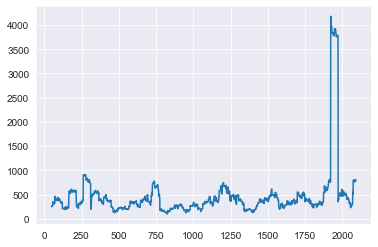

In [245]:
find_outliers(variable='favourite_count', window=50, sigma=10)

In [246]:
import panel as pn
pn.extension()

pn.interact(find_outliers)

BokehModel(combine_events=True, render_bundle={'docs_json': {'6e37914f-bec3-4c84-9767-96c8f7441bce': {'defs': …

Column
    [0] Column
        [0] IntSlider(end=150, name='window', start=-50, value=50)
        [1] IntSlider(end=30, name='sigma', start=-10, value=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00236')

In [247]:
kw = dict(window=(1, 60), variable=sorted(list(data.columns)), sigma=(1, 20))
i = pn.interact(find_outliers, **kw)
i.pprint()

Column
    [0] Column
        [0] Select(name='variable', options=['created_at', ...], value='favourite_count')
        [1] IntSlider(end=60, name='window', start=1, value=50)
        [2] IntSlider(end=20, name='sigma', start=1, value=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00246')


In [248]:
kw = dict(window=(1, 60), variable=sorted(list(data.columns)), sigma=(1, 20))
i = pn.interact(find_outliers, **kw)
i.pprint()

Column
    [0] Column
        [0] Select(name='variable', options=['created_at', ...], value='favourite_count')
        [1] IntSlider(end=60, name='window', start=1, value=50)
        [2] IntSlider(end=20, name='sigma', start=1, value=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00256')


In [250]:
text = "<br>\n# Microsoft Tweets Analysis\nSelect the variable, and the time window for smoothing"

p = pn.Row(i[1][0], pn.Column(text, i[0][0], i[0][1]))
p

BokehModel(combine_events=True, render_bundle={'docs_json': {'2d501fd3-3df1-4f79-8239-b68bcb04c02c': {'defs': …

Row
    [0] Matplotlib(Figure, name='interactive00256')
    [1] Column
        [0] Markdown(str)
        [1] Select(name='variable', options=['created_at', ...], value='text_len')
        [2] IntSlider(end=60, name='window', start=1, value=50)